In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo
from scipy import signal
import scipy.cluster.hierarchy as spc
from pandas import read_excel
from ipywidgets import widgets
from ipywidgets import interactive, HBox, VBox
import plotly.io as pio
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from plotly.graph_objs import *
from plotly.subplots import make_subplots
import plotly.express as px
import json

# General functions definitions

In [2]:
def change_config(fig):
    """
    This function return fig with the layout modified to make it prettier 
    """
    # params 
    # title and labels
    size_title = 18
    size_axes_labels = 12
    family = 'Andale Mono, monospace' # font 
    color = '#F2F2F2'
    
    
    # plot config
    width = 1300
    height = 650
    
    # configuration of the axes (ticks for each label on the axes)
    ticks = 'outside'
    tickwidth = 2 
    tickcolor = '#F2F2F2'
    ticklen = 10
    
    # grid color 
    grid_color_x = 'rgba(153, 163, 164,0.5)'
    grid_color_y = 'rgba(153, 163, 164,0.5)'
    
    
    # font for title and labels 
    font_title = dict(size=size_title, family=family, color=color)
    font_axes_labels =  dict(size=size_axes_labels, family=family, color=color)
    
    
    # remove background and configure size
    layout = Layout(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        font = font_axes_labels,
        titlefont = font_title,
        height=height,
        #width=width,
    )
    
    fig.update_layout(layout)
    
    # update the axes configuration
    fig.update_xaxes(
        ticks = ticks,
        tickwidth = tickwidth, 
        tickcolor = tickcolor,
        ticklen = ticklen,
        title_font = font_axes_labels,
        gridcolor = grid_color_x
    )
    
    fig.update_yaxes(
        ticks = ticks,
        tickwidth = tickwidth, 
        tickcolor = tickcolor,
        ticklen = ticklen,
        title_font = font_axes_labels, 
        gridcolor = grid_color_y,
        #gridwidth=None
    )
    
    return fig

def change_config_graphe_1(fig):
    '''
    Custom parametrization for plot
    '''
    # params 
    # title and labels
    size_title = 15 
    size_axes_labels = 15
    family = 'Courier' # font 
    color = '#F2F2F2'
    #color = '#2b2b2b'
    
    
    # plot config
    width = 1300
    height = 600
    
    # configuration of the axes (ticks for each label on the axes)
    ticks = 'outside'
    tickwidth = 2 
    tickcolor = '#2b2b2b'
    ticklen = 10
    
    # grid color 
    grid_color_x = 'white'
    grid_color_y = 'rgba(0,0,0,0)'
    
    
    # font for title and labels 
    font_title = dict(size=size_title, family=family, color=color)
    font_axes_labels =  dict(size=size_axes_labels, family=family, color=color)
    
    
    # remove background and configure size
    layout = Layout(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        font = font_axes_labels,
        titlefont = font_title,
        #height=height,
        #width=width,
    )
    
    fig.update_layout(layout)
    
    # update the axes configuration
    fig.update_xaxes(
      #  ticks = ticks,
       # tickwidth = tickwidth, 
       # tickcolor = tickcolor,
       # ticklen = ticklen,
        title_font = font_axes_labels,
        gridcolor = grid_color_x
    )
    
    fig.update_yaxes(
        #ticks = ticks,
        #tickwidth = tickwidth, 
        #tickcolor = tickcolor,
       # ticklen = ticklen,
        title_font = font_axes_labels, 
        gridcolor = grid_color_y,
        #gridwidth=None
    )
    
    return fig

def change_config_intro(fig):
    """
    This function return fig with the layout modified to make it prettier 
    """
    # params 
    # title and labels
    size_title = 18
    size_axes_labels = 12
    family = 'Andale Mono, monospace' # font 
    color = '#F2F2F2'
    
    
    # plot config
    width = 1300
    height = 650
    
    # configuration of the axes (ticks for each label on the axes)
    ticks = 'outside'
    tickwidth = 2 
    tickcolor = '#F2F2F2'
    ticklen = 10
    
    # grid color 
    grid_color_x = 'rgba(153, 163, 164,0.5)'
    grid_color_y = 'rgba(153, 163, 164,0.5)'
    
    
    # font for title and labels 
    font_title = dict(size=size_title, family=family, color=color)
    font_axes_labels =  dict(size=size_axes_labels, family=family, color=color)
    
    
    # remove background and configure size
    layout = Layout(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        font = font_axes_labels,
        titlefont = font_title,
        height=height,
        #width=width,
    )
    
    fig.update_layout(layout)
    
    # update the axes configuration
    fig.update_xaxes(
        ticks = ticks,
        tickwidth = tickwidth, 
        tickcolor = tickcolor,
        ticklen = ticklen,
        title_font = font_axes_labels,
        gridcolor = grid_color_x
    )
    
    fig.update_yaxes(
        ticks = ticks,
        tickwidth = tickwidth, 
        tickcolor = tickcolor,
        ticklen = ticklen,
        title_font = font_axes_labels, 
        gridcolor = grid_color_y,
    )
    return fig

def plotMapSlider(data,title,zMax,zMin,colorbarTitle,vWidth,vHeight):
    """
    Plot data over multiple timestamps
    """
    data_slider = []
    for ix in range(0,10):
        data_one_year = dict(
                            type='choropleth',
                            locations=country_list_iso, # Spatial coordinates
                            z = list(data[country_list_iso].iloc[ix].values),
                            locationmode = 'ISO-3', # set of locations match entries in `locations`
                            autocolorscale=False,
                            colorscale = "Magma",
                            reversescale=True,
                            zmax = zMax,
                            zmin = zMin,
                            colorbar_title = "GDP (€)",
                            )
        ix = ix+1
        data_slider.append(data_one_year) 
    steps = []

    for i in range(len(data_slider)):
        step = dict(method='restyle',args=['visible', [False] * len(data_slider)],label=str(int(2004+i)))
        step['args'][1][i] = True
        steps.append(step)

    #create 'sliders' object from the 'steps' 
    sliders = [dict(active=0, pad={"t": 1}, steps=steps)] 

    layout = dict(geo=dict(scope='europe', bgcolor='rgba(0,0,0,0)'),sliders=sliders,title={
        'text': "Evolution of the GDP over the years",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},autosize=True,dragmode = False, height=1000, paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)')
    fig = dict(data=data_slider, layout=layout,) 
    #UNCOMMENT TO SAVE
    #pio.write_html(fig, '../DataStoryMeatConsumption/graphs/economy/map_gdp.html')
    pio.show(fig)
    
def intersection(lst1, lst2): 
    """
    This function return the element contained in lst1 and lst2
    """
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

# Part 1: Introduction

For the milestone 2 we explored many topics that could influence the meat consumption like the ecology, animale care and economy. As suggested in the feedback of milestone 2, we choose one of those topic to do an analysis more in depth. We choose the economy for this milestone.
In milestone 2 we generated the csv we are using here so we kept the notebook of milestone 2 in a separated file.

We first the mean of the meat consumption in the europe:

In [9]:
mean_per_year = pd.read_csv('data_vinc/meat_consumption_per_habita_2004_2013.csv').groupby(['years'])['consumption per habita'].mean()

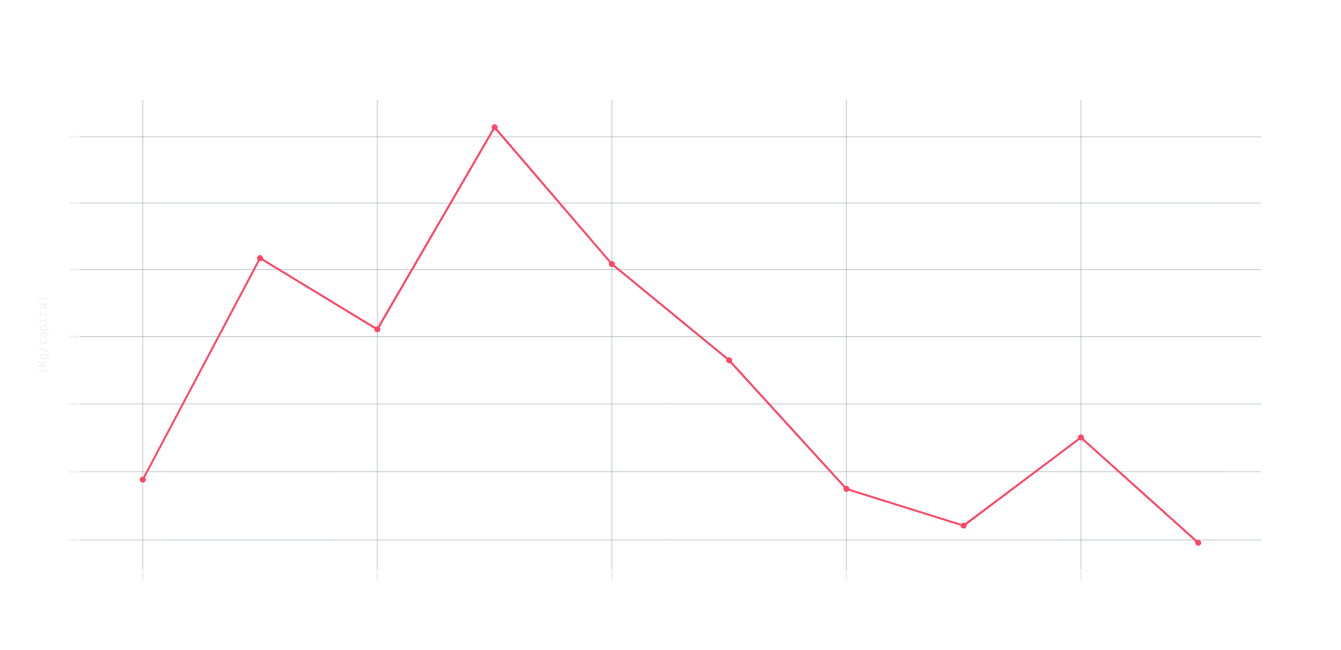

In [12]:
trace0 = go.Scatter(
    x=mean_per_year.index,
    y=mean_per_year.values,
    marker=dict(
        color='#FF4464',
    ),
  )

fig = make_subplots(rows=1, cols=1)
fig.update_layout(yaxis_type="log")
fig.update_yaxes(title_text='(Kg/capita)')
fig.update_xaxes(showticklabels=False,gridcolor = 'rgba(0,0,0,0)',)
fig.update_yaxes(showticklabels=False,gridcolor = 'rgba(0,0,0,0)',)
fig.append_trace(trace0, 1, 1)
change_config_intro(fig).show()

## Meat consumption per EU country

New let's see the consumption for each countries, to visualize if there is any noticable differences between some countries:

In [5]:
meat_consumption_path = 'data_aslam/fao_meat_consumption_pretty_clean.csv'
meat_consumption = pd.read_csv(meat_consumption_path, low_memory=False, delimiter=';')
meat_consumption = meat_consumption.drop(columns=['Domain'])

In [6]:
europe = [
    "Austria", 
    "Belgium", 
    "Bulgaria", 
    "Croatia", 
    "Republic of Cyprus", "Cyprus",
    "Czech Republic", "Czechia",
    "Denmark", 
    "Estonia", 
    "Finland", 
    "France", 
    "Germany", 
    "Greece", 
    "Hungary", 
    "Ireland", 
    "Italy", 
    "Latvia", 
    "Lithuania", 
    "Luxembourg", 
    "Malta", 
    "Netherlands", 
    "Poland", 
    "Portugal", 
    "Romania", 
    "Slovakia", 
    "Slovenia", 
    "Spain", 
    "Sweden", 
    "United Kingdom"
]

In [7]:
# filter to take only the countries from EU
meat_consumption = meat_consumption[meat_consumption.Country.isin(europe)]

In [8]:
# obtain the consumption by summing ['Bovine Meat', 'Mutton & Goat Meat', 'Pigmeat', 'Poultry Meat']
meat_consumption = meat_consumption.groupby(['Country','Year']).sum().unstack(level=1)

In [9]:
#reshape dataframe
meat_consumption['Country'] = meat_consumption.index
meat_consumption = pd.melt(meat_consumption, id_vars=['Country'])

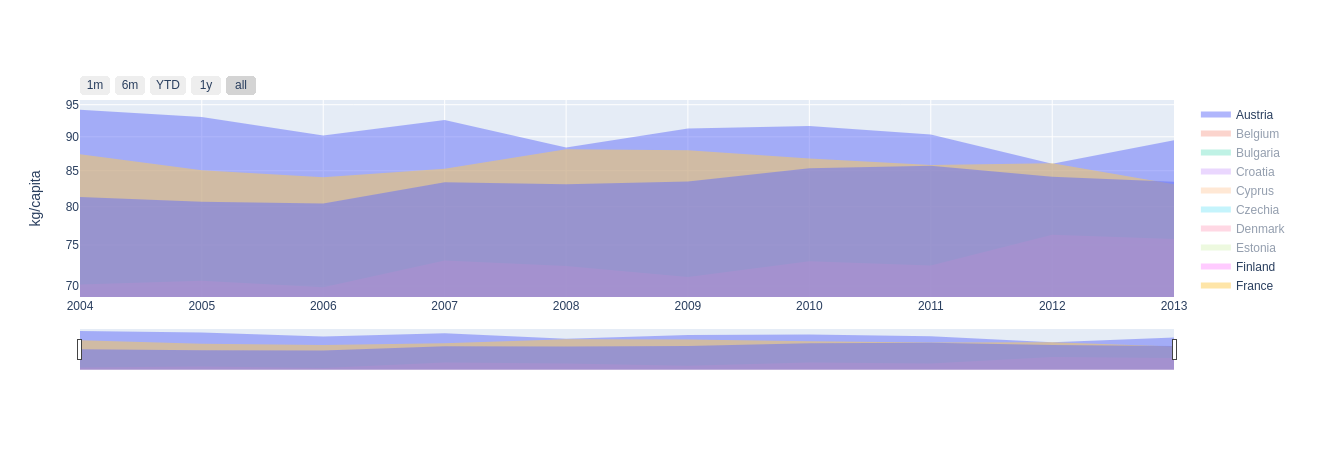

In [10]:
fig = go.Figure()
country_to_disp = ['Austria', 'Finland','Germany', 'France']

for country in meat_consumption.Country.unique():
    if(country in country_to_disp):
        fig.add_trace(go.Scatter(
            x=meat_consumption[meat_consumption.Country == country]['Year'],
            y=meat_consumption[meat_consumption.Country == country]['value'],
            fill='tozeroy',
            mode='none',
            #color='Area',
            name=country,
          ))
        
    else:
        fig.add_trace(go.Scatter(
            x=meat_consumption[meat_consumption.Country == country]['Year'],
            y=meat_consumption[meat_consumption.Country == country]['value'],
            visible = "legendonly",
            #fill='tonexty',
            fill='tozeroy',
            mode='none',
            #color='Area',
            name=country,
              )
        )
    
# Overlay both histograms
#fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.1)
fig.update_layout(yaxis_type="log")

# Add range slider
fig.update_layout(
    xaxis=go.layout.XAxis(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    ), 
    yaxis_title="kg/capita",
)

#change_config(fig).show()
fig.show()

#pio.write_html(change_config(fig), file='graphe2.html', auto_open=True)

# Part 2: Economic data and the meat consumption of europe

In [11]:
country_list = ["FR","BE","BG","CY","CZ","DE","DK","EE","ES",
                "FI","AT","GB","GR","HR","HU","IE","IT","LT",
                "LU","LV","MT","NL","PL","PT","RO","SE","SI","SK"]

country_list_iso = ["FRA","BEL","BGR","CYP","CZE","DEU","DNK",
                    "EST","ESP","FIN","AUT","GBR","GRC","HRV",
                    "HUN","IRL","ITA","LTU","LUX","LVA","MLT",
                    "NLD","POL","PRT","ROU","SWE","SVN","SVK"]

In [12]:
#load unemployment data and reshape it
df_unemp = pd.read_csv('data_nico/Unemp_total.csv', index_col=None)
df_unemp = df_unemp[['LOCATION', 'TIME', 'Value']].pivot_table(values='Value', index='TIME', columns ='LOCATION')

#load gdp data
df_gdp = pd.read_csv('data_vinc/PIB28.csv')
df_gdp = df_gdp[["LOCATION","TIME","Value"]].pivot_table(values="Value", index='TIME', columns ='LOCATION')

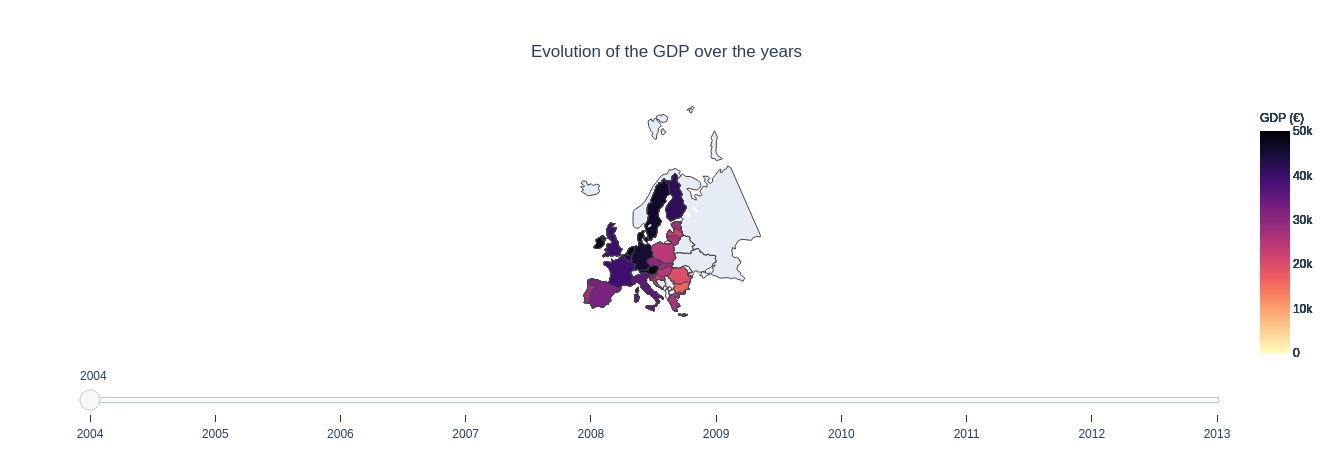

In [13]:
#plot map with the value of gdp per country
plotMapSlider(df_gdp, 'GDP over the years', 50000, 0, 'oij', 1300, 900)

# PIB / CONSO VIANDE

In [14]:
#load meat consumption per capita data
df_meat = pd.read_csv('data_vinc/meat_consumption_per_habita_2004_2013.csv',  index_col=0)

#some countries are not available in this dataset so we puse the data only for 
country_list2 = ['AUT', 'BEL', 'BGR', 'HRV', 'DNK', 'EST',
        'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 
        'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL','POR', 
        'ROU', 'SVK', 'SVN', 'ESP', 'SWE','GBR']

#reshape the dataframe
column = "consumption per habita"
df_meat = df_meat[["Area","years",column]].pivot_table(values=column, index='years', columns ='Area')#values=column, index='TIME', columns='LOCATION')
df_meat.columns = country_list2
df_meat

,AUT,BEL,BGR,HRV,DNK,EST,FIN,FRA,DEU,GRC,...,MLT,NLD,POL,POR,ROU,SVK,SVN,ESP,SWE,GBR
years,,,,,,,,,,,,,,,,,,,,,
2004,96.161250,80.508475,50.483225,50.165768,73.550663,61.482159,72.225930,90.701505,84.403962,81.350090,...,100.033261,78.853332,77.715442,86.507751,55.991452,62.175684,90.160802,108.772674,77.765782,86.246459
2005,95.471982,83.573843,50.464501,50.337972,94.430190,66.232476,72.756980,87.665260,83.926409,84.595027,...,96.853984,77.029100,77.251866,87.472958,65.848690,66.074970,91.610391,108.277056,78.012365,85.357677
2006,92.315543,80.293914,47.710355,58.434959,80.700748,70.333901,71.923556,82.793456,84.342177,85.417924,...,98.765676,81.240537,77.600328,90.087622,65.154959,62.349616,87.353334,107.248423,77.919908,87.099448
2007,94.531150,83.801516,46.747034,63.521060,91.792232,74.464600,76.180297,83.400025,87.857720,80.554490,...,108.476983,74.703546,79.631786,97.032182,65.545056,60.299487,85.058673,110.439587,79.554434,86.044177
2008,90.274554,69.373704,51.343429,63.080260,79.623200,70.231015,75.653469,90.958527,87.328982,80.644162,...,100.531591,89.726559,76.792622,95.704307,67.262857,61.383198,89.540256,101.513197,80.475430,82.229407
2009,93.101346,67.701533,55.576990,67.752627,67.677278,75.613518,74.347851,90.131774,87.948693,82.651742,...,99.774655,89.774301,78.718527,96.563348,71.525404,61.310928,88.074861,97.363122,79.404975,81.412141
2010,94.352692,69.926812,52.817618,61.587131,78.052475,76.502486,76.054480,90.010872,89.667453,83.188772,...,96.612057,81.206690,78.557986,96.373199,63.464899,59.364687,86.469016,95.984610,81.578626,82.674511
2011,93.729508,67.177922,56.449406,61.074297,75.890709,79.719628,75.717042,88.705963,91.994640,81.180273,...,98.797799,77.150307,79.815635,93.258869,58.963143,61.753052,82.919185,95.420391,82.841506,83.620887
2012,89.556275,72.680396,56.228662,69.223832,111.100837,63.385845,79.610951,88.959381,90.180373,78.294084,...,95.797828,91.570122,77.265029,91.535152,58.618642,51.625347,79.299595,95.838759,80.882814,83.675764


In [15]:
#countries both regroups the countries that are present in the GDP dataset and the meat consumption dataset
countries_both = intersection(df_meat.columns, df_gdp.columns)
print("data meat and GDP available for:")
print(countries_both)

data meat and GDP available for:
['AUT', 'BEL', 'BGR', 'HRV', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE', 'GBR']


In [16]:
#Sort the columns by their name to have the same order on each dataset
df_meat = df_meat[countries_both].reindex(sorted(df_meat[countries_both].columns), axis=1)
df_gdp = df_gdp[countries_both].reindex(sorted(df_gdp[countries_both].columns), axis=1)

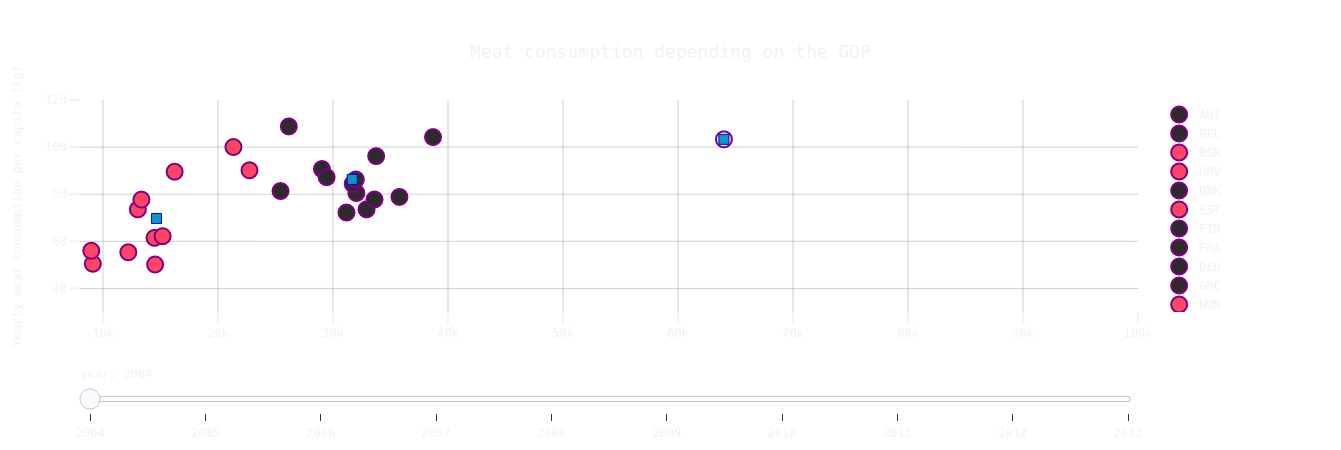

In [17]:
def plot_kmeans_slider():
    degree = 2

    colors_kmeans = ['#FF4464', '#2B2B2B', '#F2F2F2']
    color_centroid = '#0d98ba'
    color=[f'rgb({np.random.randint(0,256)}, {np.random.randint(0,256)}, {np.random.randint(0,256)})' for _ in range(25)]

    k_means_groups = []

    # Create figure
    fig = go.Figure()
    fig_lin = go.Figure()

    for i in range(10):
        visible = (i==0)
        #regression on data of one year
        model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
        y=df_meat[countries_both].iloc[i].to_numpy()[:, np.newaxis]
        x=df_gdp[countries_both].iloc[i].to_numpy()[:, np.newaxis]
        model.fit(x, y)
        t = np.linspace(0, 100000, 1000)
        t = t[:, np.newaxis]
        yt = model.predict(t)
        #fig.add_trace(go.Scatter(x = t[:,0],y = yt[:,0], name='Interpolation', marker_color = 'red', opacity=0.,line=dict(color='firebrick', width=3, dash='dot'), visible=visible))

        #kmean
        data_kmean = []
        for c in countries_both:
            data_kmean.append([df_gdp[c].iloc[i], df_meat[c].iloc[i]])
        data_kmean = np.array(data_kmean)
        k_means = KMeans(n_clusters=3, random_state=39847).fit(data_kmean)#81982 #123 #39847
        groups = k_means.predict(data_kmean)
        k_means_groups.append(groups)

        #one scatter per country
        for j, c in enumerate(countries_both):
            fig.add_trace(go.Scatter(y=[df_meat[c].iloc[i]], x=[df_gdp[c].iloc[i]], mode='markers', 
                marker=dict(
                    size=16,
                    color=colors_kmeans[groups[j]],#[str(i) for i in range(df_gdp.iloc[0].size)]
                    line=dict(
                    width=2,
                    color='purple')),
                text=c, name=c, visible=visible))

        fig.add_trace(go.Scatter(x = k_means.cluster_centers_[:,0],y = k_means.cluster_centers_[:,1],
                                 mode = 'markers', name='K means centroïds',
                                 marker_color = color_centroid,
                                 opacity=1, visible=visible,
                                 marker=dict(size=10, symbol = 'square', line=dict(width=1, color='blue'))))


    fig.update_xaxes(range=[8000, 100000])
    fig.update_yaxes(range=[30, 120])

    # Make 10th trace visible
    fig.data[0].visible = True

    # Create and add slider
    n = 26
    steps = []
    for i in range(0, len(fig.data), n):
        step = dict(
            method="restyle",
            args=["visible", [False] * len(fig.data)],
            label=str(int(2004+i/n))
        )
        for j in range(n):
            step["args"][1][i+j] = True  # Toggle i'th trace to "visible"
        steps.append(step)

    sliders = [dict(
        active=10,
        currentvalue={"prefix": "year: "},
        pad={"t": 50},
        steps=steps,
        name = "date"
    )]

    fig.update_layout(
        #visible=[False for i in range(270)],
        autosize=True,
        sliders=sliders,
        title={
            'text': "Meat consumption depending on the GDP",
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        yaxis_title="Yearly meat consumption per capita (kg)",

    )
    
    fig = change_config(fig)
    return fig, k_means_groups
    
fig_kmeans, k_means_groups = plot_kmeans_slider()
fig_kmeans.show()

In [18]:
#pio.write_html(fig_kmeans, file='../DataStoryMeatConsumption/graphs/economy/meat_salary.html', auto_open=False)

As we can see the k-means algorithm with k=3 splits the data into 3 groups: a group of 'poor' countries, 'rich' countries and the Luxembourg. The GDP in the Luxembourg is so high that we can consider this country as an outlier.

### Mean of the consumption of k means groups

In [19]:
#kmeans mean
means_g1 = []
means_g2 = []
g1s = []
g2s = []

#index 0 5 and -1 correspond to the data of years 2004, 2009, 2013:
for y in [0, 5, -1]:
    group1 = []
    group2 = []
    for i in range(len(k_means_groups[y])):
        if k_means_groups[y][i] == 0:
            group1.append(countries_both[i])
        if k_means_groups[y][i] == 1:
            group2.append(countries_both[i])
    
    g1s.append(group1)
    g2s.append(group2)
    means_g1.append(df_meat.iloc[y][group1].mean())
    means_g2.append(df_meat.iloc[y][group2].mean())
            
print("Means of meat consumption 2004, 2009, 2013 for the 'poor' group:", means_g1)
print("Means of meat consumption 2004, 2009, 2013 for the 'rich' group:", means_g2)

Means of meat consumption 2004, 2009, 2013 for the 'poor' group: [69.69659388234909, 74.36410866835517, 70.83483632171522]
Means of meat consumption 2004, 2009, 2013 for the 'rich' group: [86.30860136498633, 83.65911007544607, 86.97072761654944]


Plot of the mean of the meat consumption and the unemployment for the group of countries with a lower GDP:

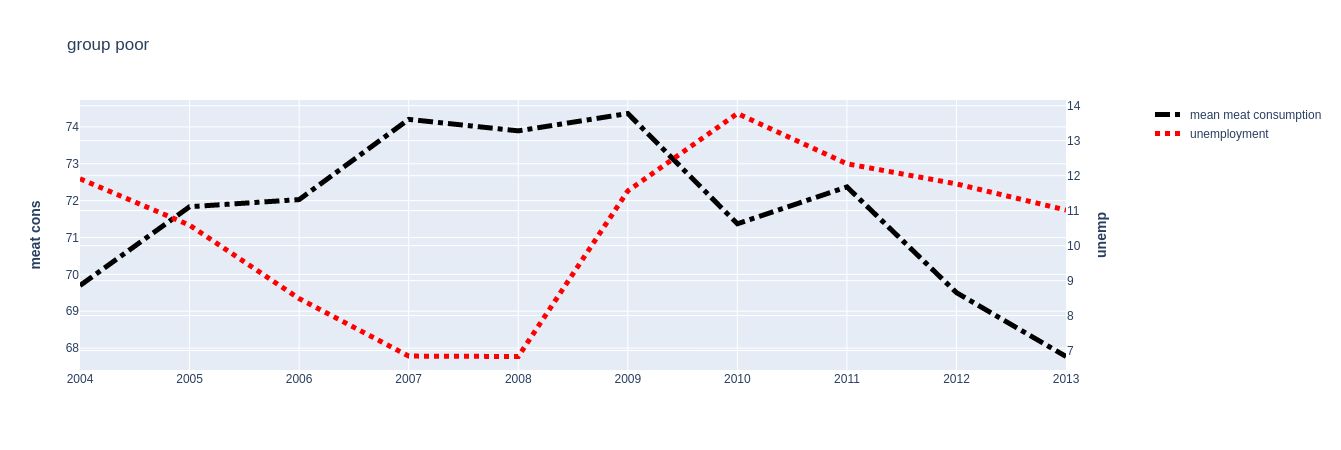

In [20]:
fkmg = make_subplots(rows=1, cols=1,
                    specs=[[{"secondary_y": True}]])
    
fkmg.add_trace(go.Scatter(y = df_meat[g1s[0]].mean(axis=1), x=[2004+i for i in range(10)], mode='lines', name='mean meat consumption', line=dict(color='black', width=5, dash='dashdot')))

fkmg.add_trace(go.Scatter(y = df_unemp[['EST', 'HUN', 'LVA', 'LTU', 'POL', 'SVK', 'SVN']].mean(axis=1)[6:16], x=[2004+i for i in range(10)], mode='lines', name='unemployment', line=dict(color='red', width=5, dash='dot')), secondary_y=True)

fkmg.update_yaxes(title_text="<b>meat cons", secondary_y=False)
fkmg.update_yaxes(title_text="<b>unemp", secondary_y=True)
fkmg.update_layout(title="group poor")

fkmg.show()  

As we can see it seems that it's inversely correlated. Let's see if it's the same with richer countries:

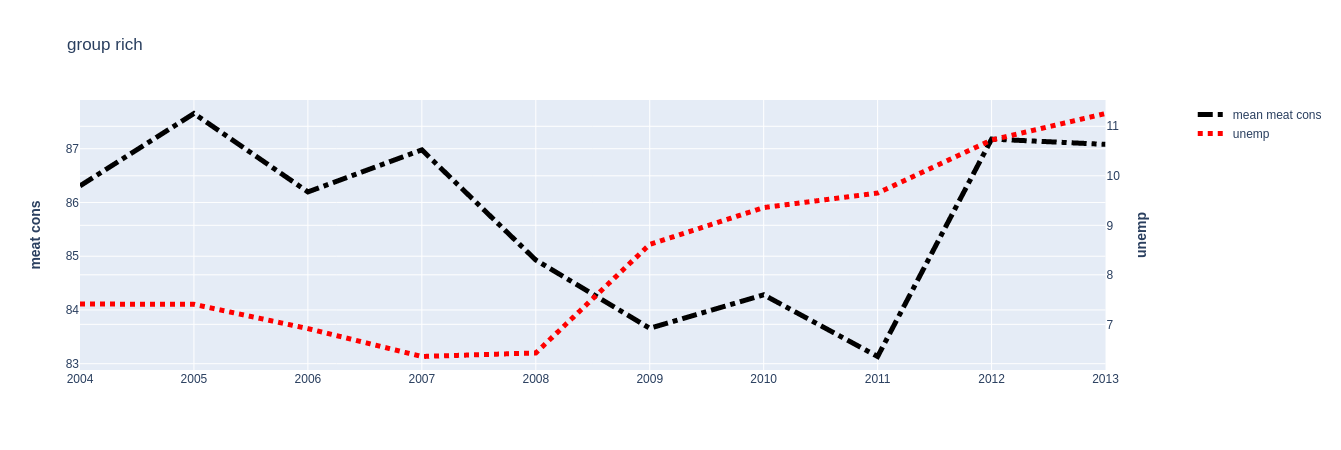

In [21]:
fkmg2 = go.Figure()

fkmg2 = make_subplots(rows=1, cols=1, specs=[[{"secondary_y": True}]]) 

fkmg2.add_trace(go.Scatter(y = df_meat[g2s[0]].mean(axis=1), x=[2004+i for i in range(10)], mode='lines', name='mean meat cons', line=dict(color='black', width=5, dash='dashdot')))
fkmg2.add_trace(go.Scatter(y = df_unemp[g2s[0]].mean(axis=1)[6:16], x=[2004+i for i in range(10)], mode='lines', name='unemp', line=dict(color='red', width=5, dash='dot')), secondary_y=True)
    
fkmg2.update_yaxes(title_text="<b>meat cons", secondary_y=False)
fkmg2.update_yaxes(title_text="<b>unemp", secondary_y=True)

fkmg2.update_layout(title="group rich")
    
fkmg2.show()

### Interpolation of the meat consumption in terms of the GDP

In [22]:
#this is the same list as countries both but without the Luxembourg because we can consider this country as an outlier
#due to the big GDP
countries_both_nLUX = ['AUT', 'BEL', 'BGR', 'HRV', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'MLT', 'NLD', 'POL', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE', 'GBR']

In [23]:
#model 1 to 4 makes an interpolation of degrees 1 to 4
model1 = make_pipeline(PolynomialFeatures(1), linear_model.LinearRegression())
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model3 = make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression())
model4 = make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression())

#mix the data over all year so it becomes intemporal:
y=df_meat[countries_both_nLUX].iloc[0].to_numpy()#[:, np.newaxis]
x=df_gdp[countries_both_nLUX].iloc[0].to_numpy()#[:, np.newaxis]
for i in range(1, 10):
    y = np.concatenate((y, df_meat[countries_both_nLUX].iloc[i].to_numpy()))
    x = np.concatenate((x, df_gdp[countries_both_nLUX].iloc[i].to_numpy()))
y_=y[:, np.newaxis]
x_=x[:, np.newaxis]

#do the regression
model1.fit(x_, y_)
model2.fit(x_, y_)
model3.fit(x_, y_)
model4.fit(x_, y_)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [24]:
#make the prediction on the linspace to see how it looks
t = np.linspace(0, 100000, 1000)
t = t[:, np.newaxis]
yt1 = model1.predict(t)
yt2 = model2.predict(t)
yt3 = model3.predict(t)
yt4 = model4.predict(t)

In [25]:
#score the best 2 models
y_m1 = model1.predict(x_)[:, 0]
y_m3 = model3.predict(x_)[:, 0]
m1_r2 = r2_score(y_[:,0], y_m1)
m3_r2 = r2_score(y_[:,0], y_m3)
print('score model 1: ', m1_r2)
print('score model 3: ', m3_r2)

score model 1:  0.3048196519052214
score model 3:  0.38452621899976946


In [26]:
#print weights of linear model
linreg1 = model1.named_steps['linearregression']
print("model 1 weights:", linreg1.intercept_[0], ', ', linreg1.coef_[0, 1])

model 1 weights: 57.791595655305045 ,  0.00072967206970031


In [27]:
#print the weights of model of degree 3 
linreg3 = model3.named_steps['linearregression']
print("model 3 weights:", linreg3.intercept_[0], ', ', linreg3.coef_[0, 1],', ', linreg3.coef_[0, 2],', ', linreg3.coef_[0, 3])

model 3 weights: 14.656306382156302 ,  0.004741033969645882 ,  -1.0439383894426761e-07 ,  7.605990490211489e-13


Now we plot the results of the regressions:

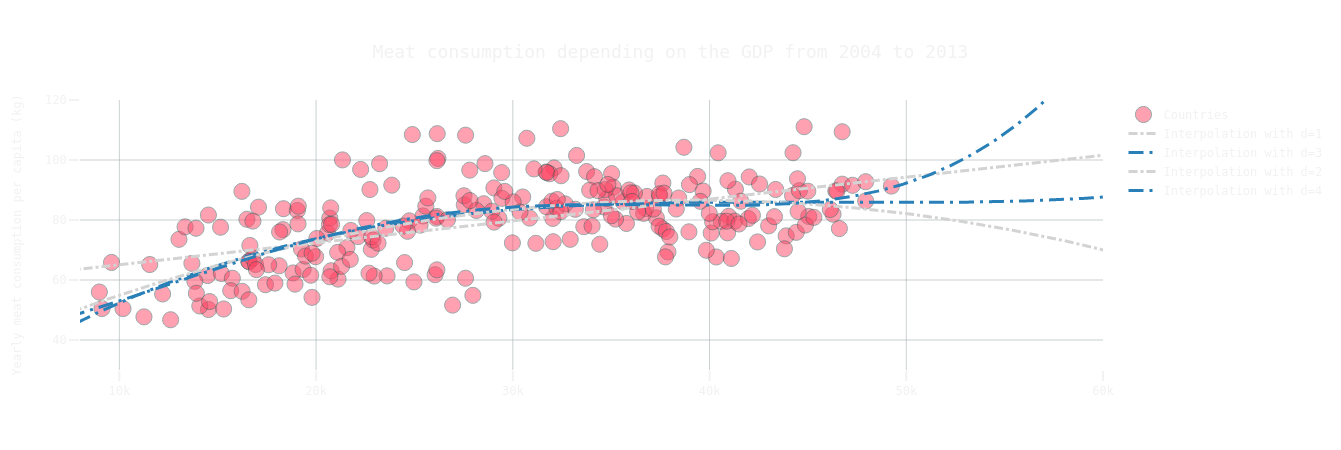

In [28]:
#print the result
#2 and 4 are commentend because they do not represent well the data in our opinion
countries_both_nLUX_all = []
for i in range(10):
    countries_both_nLUX_all+=countries_both_nLUX
fig3 = go.Figure()
fig3.add_trace(go.Scatter(y=y, x=x, mode='markers', 
            marker=dict(
                opacity=0.5,
                size=16,
                color='#FF4464',
                line=dict(
                width=1,
                color='DarkSlateGrey')), name='Countries', text=countries_both_nLUX_all),)

#fig3.add_trace(go.Scatter(x = t[:,0],y = yt2[:,0], name='Interpolation with d=2', marker_color = 'red', opacity=1,line=dict(color='firebrick', width=3, dash='dash')))
fig3.add_trace(go.Scatter(x = t[:,0],y = yt1[:,0], name='Interpolation with d=1', marker_color = 'red', opacity=1,line=dict(color='LightGrey', width=3, dash='dashdot'), visible=True))
fig3.add_trace(go.Scatter(x = t[:,0],y = yt3[:,0], name='Interpolation with d=3', marker_color = 'red', opacity=1,line=dict(color='#2980b9 ', width=3, dash='longdashdot')))
fig3.add_trace(go.Scatter(x = t[:,0],y = yt2[:,0], name='Interpolation with d=2', marker_color = 'red', opacity=1,line=dict(color='LightGrey', width=3, dash='dashdot'), visible=True))
fig3.add_trace(go.Scatter(x = t[:,0],y = yt4[:,0], name='Interpolation with d=4', marker_color = 'red', opacity=1,line=dict(color='#2980b9 ', width=3, dash='longdashdot')))

#fig3.add_trace(go.Scatter(x = t[:,0],y = yt4[:,0], name='Interpolation with d=4', marker_color = 'red', opacity=1,line=dict(color='dodgerblue', width=3, dash='solid')))
fig3.update_xaxes(range=[8000, 60000])
fig3.update_yaxes(range=[30, 120])
fig3.update_layout(title={
        'text': "Meat consumption depending on the GDP from 2004 to 2013",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        yaxis_title="Yearly meat consumption per capita (kg)",)

change_config(fig3).show()

As we can see the best interpolation are with d=1 and d=3 so that is what we decided to show on the final data story.

In [29]:
pio.write_html(fig3, file='../DataStoryMeatConsumption/graphs/economy/interpolation.html', auto_open=False)

### Map of the assigned cluster for the k-means over the years

In [30]:
def plotMapSlider(title,zMax,zMin,colorbarTitle,vWidth,vHeight):
    """
    Plot map with temporal data
    """
    data_slider = []
    for ix in range(0,10):
        visible = (ix==0)
        data_one_year = dict(
                            type='choropleth',
                            locations=countries_both, # Spatial coordinates
                            z = list(k_means_groups[ix]),
                            locationmode = 'ISO-3', # set of locations match entries in `locations`
                            autocolorscale=False,
                            colorscale = "YlGnBu",
                            zmax = zMax,
                            zmin = zMin,
                            visible=visible
                            )
        ix = ix+1
        data_slider.append(data_one_year) 
    steps = []

    for i in range(len(data_slider)):
        step = dict(method='restyle',args=['visible', [False] * len(data_slider)],label=(str(int(2004+i))))
        step['args'][1][i] = True
        steps.append(step)

    #create 'sliders' object from the 'steps' 
    sliders = [dict(active=0, pad={"t": 1}, steps=steps)] 

    layout = dict(geo=dict(scope='europe', bgcolor='rgba(0,0,0,0)'),sliders=sliders,autosize=False, width=vWidth,height=vHeight,dragmode = False,title={
        'text': "Evolution of the 3 clusters over the years",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)')
    fig = dict(data=data_slider, layout=layout,) 
    pio.show(fig)
    #l = pio.from_json(json.dumps(fig))
    pio.write_html(fig, '../DataStoryMeatConsumption/graphs/economy/map_groups.html')

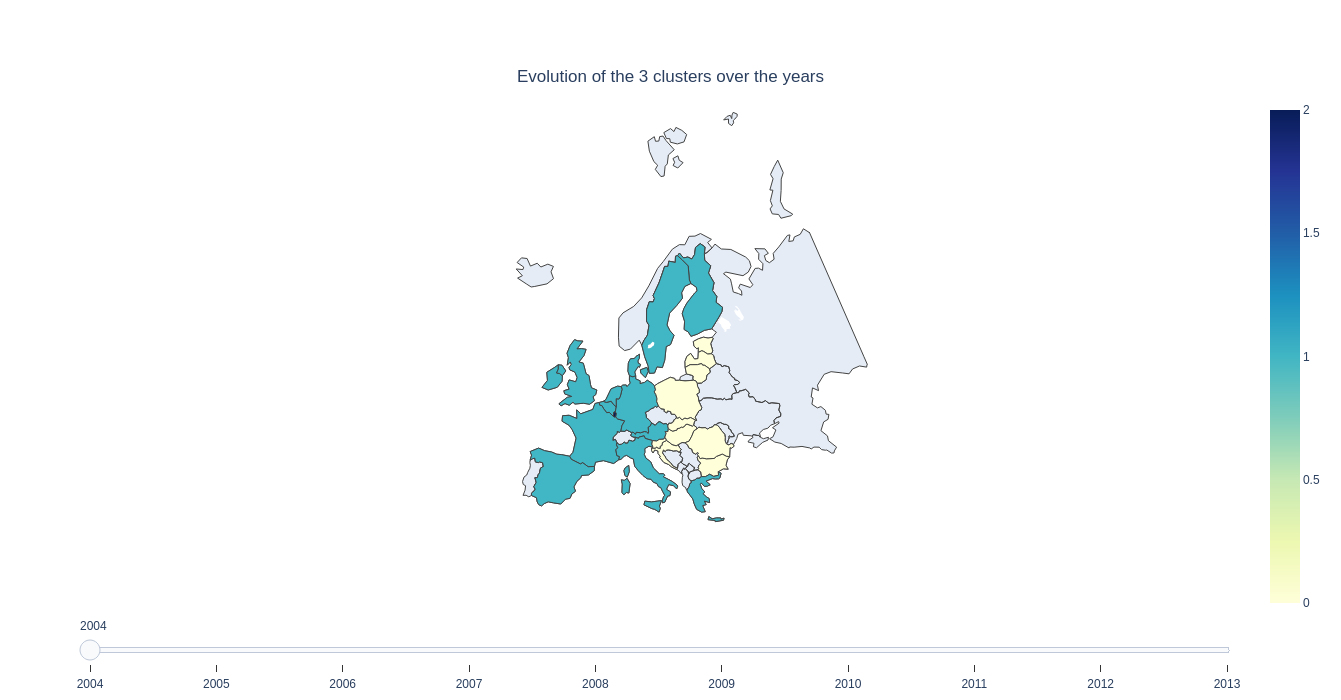

In [31]:
#plot map with the value of the group assigned with the k means over the years
plotMapSlider("Eurobarometer",2,0," population thinks about it's one of the most important threat",700,700)

Here we can see that the clusters are stable over the years. The noticable change is Greece and Spain that go from the group with higher GDP to the group with lower GDP after the crisis of 2008.

# Part 3: France

In [32]:
listMeat=["Meat, cattle","Meat, chicken","Meat, duck","Meat, goose and guinea fowl","Meat, horse","Meat, pig","Meat, rabbit","Meat, sheep","Meat, turkey"]
listDate=["Y2004","Y2005","Y2006","Y2007","Y2008","Y2009","Y2010","Y2011","Y2012","Y2013","Y2014","Y2015","Y2016","Y2017","Y2018"]

Here we plot the consumption of meat of France:

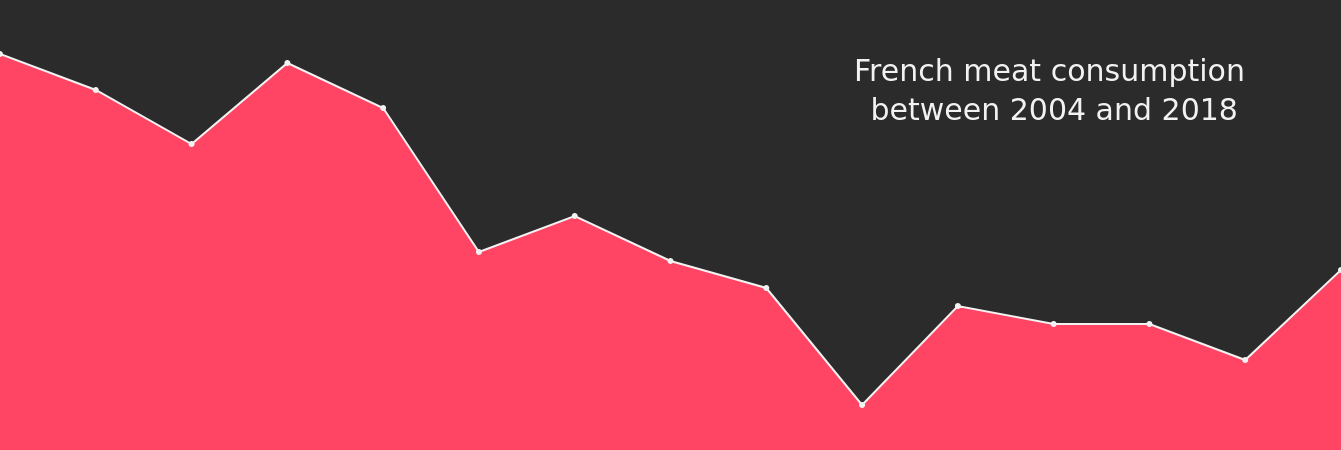

In [33]:
meat_consumption_path = 'data_aslam/fr_consumption.csv'
meat_consumption = pd.read_csv(meat_consumption_path)

fig_intro_part3 = go.Figure()
fig_intro_part3.add_trace(go.Scatter(x=meat_consumption["Date"], y=meat_consumption["Total(kg)/hab"], fill='tonexty',fillcolor="#FF4464",marker_color="#F2F2F2")) # fill to trace0 y
fig_intro_part3.update_layout(
    paper_bgcolor="#2B2B2B",
    plot_bgcolor='#2B2B2B',
    margin=go.layout.Margin(
        l=0,
        r=0,
        b=0,
        t=0,
        pad=0
    ),annotations=[
        go.layout.Annotation(
            x=2015,
            y=88,
            xref="x",
            yref="y",
            text="French meat consumption <br>between 2004 and 2018",
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=0,
            #bgcolor="#F2F2F2",
            height=100,
            font=dict(
            family="sans serif",
            size=30,
            color="#F2F2F2"
            )
        )
    ],
)

fig_intro_part3.update_xaxes(showticklabels=False,gridcolor = 'rgba(0,0,0,0)',)
fig_intro_part3.update_yaxes(showticklabels=False,range=[84, 89],gridcolor = 'rgba(0,0,0,0)',)

fig_intro_part3.show()
#pio.write_html(fig, file='consoFR.html', auto_open=True)

Price for each type of meat, to see if the evolution of each categories are equivalent or completely different:

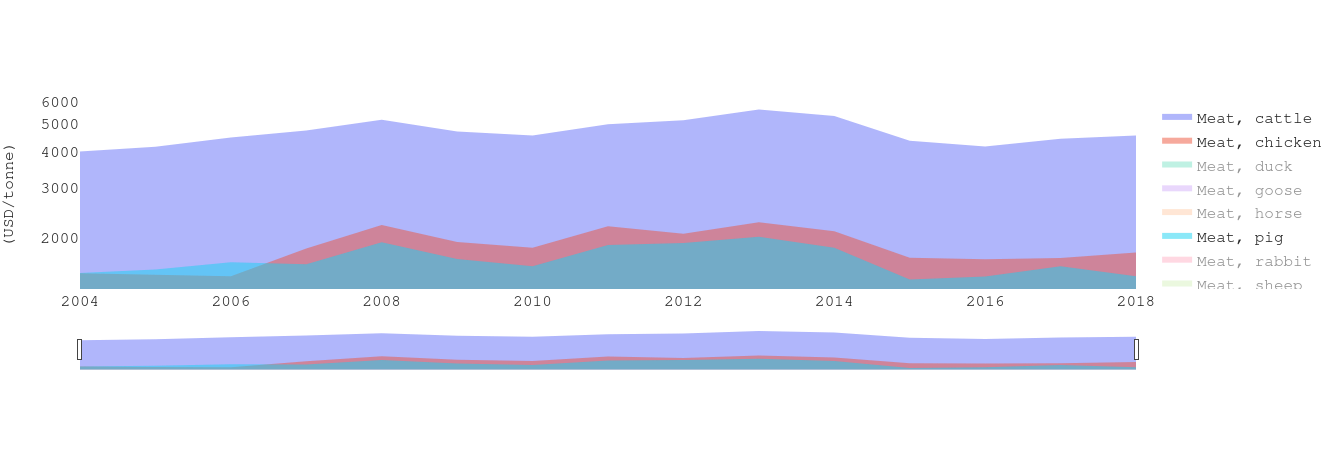

In [34]:
#dataframe for the meat price in france for different meat
meat_price = pd.read_csv('data_aslam/Prices_E_Europe/Prices_E_Europe.csv')
meat_price=meat_price.loc[meat_price["Area"]=="France"]
meat_price=meat_price.loc[meat_price["Unit"]=="USD"]
meat_price=meat_price.loc[meat_price["Item"].isin(listMeat)][["Item"]+listDate]


price_food_FR_path = 'data_aslam/Prices_E_Europe/priceFR.csv'
new_df = pd.read_csv(price_food_FR_path)
fig = go.Figure()


listMeat2=["Meat, cattle","Meat, chicken","Meat, duck","Meat, goose","Meat, horse","Meat, pig","Meat, rabbit","Meat, sheep","Meat, turkey"]
listDate2=[2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

meat_to_disp = ['Meat, cattle', 'Meat, pig',"Meat, chicken"]
xx=0;
for meat in listMeat:
    if(meat in meat_to_disp):
        fig.add_trace(go.Scatter(
            x=listDate2, 
            y=meat_price[meat_price.Item==meat][listDate].to_numpy()[0],
            #visible = "legendonly",
            #fill='tonexty',
            fill='tozeroy',
            mode='none',
            #color='Area',
            name=listMeat2[xx],
          ))
        
    else:
        fig.add_trace(go.Scatter(
            x=listDate2,
            y=meat_price[meat_price.Item==meat][listDate].to_numpy()[0],
            visible = "legendonly",
            fill='tozeroy',
            mode='none',
            name=listMeat2[xx],
          ))
    xx+=1;
    

fig.update_traces(opacity=0.1)

fig.update_layout(yaxis_type="log",paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',font = dict(size=16, family='Courier', color="#2B2B2B"),)

# Add range slider
fig.update_layout(
    xaxis=go.layout.XAxis(

        rangeslider=dict(
            visible=True
        ),
        type="linear"
    )
    
)
fig.update_xaxes(gridcolor = 'rgba(0,0,0,0)',title_font = dict(size=16, family='Courier', color="#2B2B2B"))
fig.update_yaxes(gridcolor = 'rgba(0,0,0,0)',title_font = dict(size=16, family='Courier', color="#2B2B2B"),title_text="(USD/tonne)")

fig.show()

#pio.write_html(fig, file='graphePriceFR.html', auto_open=True)

Plot of the numbers of job seekers per years in France:

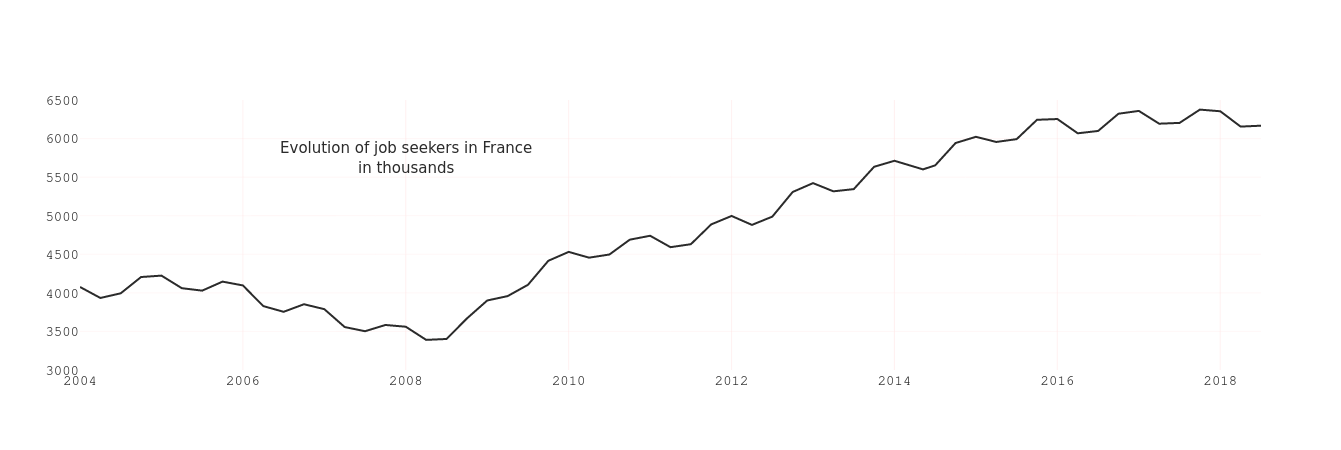

In [35]:
color = "#2B2B2B"
chomageFR_path = 'data_aslam/chomageFR.csv'
chomageFR = pd.read_csv(chomageFR_path)
chomageFR = chomageFR.iloc[::-1]


fig = go.Figure()
fig.update_yaxes(range=[3000, 6500])
fig.add_trace(go.Scatter(x=chomageFR["periode"], y=chomageFR["chomage"], fill='tonexty',fillcolor="rgba(0,0,0,0)",marker_color=color)) # fill to trace0 y
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        font = dict(size=14, family='Courier', color=color),
        annotations=[
        go.layout.Annotation(
            x=2008,
            y=5750,
            xref="x",
            yref="y",
            text="Evolution of job seekers in France<br>in thousands",
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=0,
            #bgcolor="#F2F2F2",
            height=100,
            font=dict(
            family="sans serif",
            size=15,
            color=color
            )
        )
    ],)
fig.update_xaxes(gridcolor = 'rgba(255, 229, 229,0.5)',title_font = dict(size=10, family='Courier', color=color))
fig.update_yaxes(gridcolor = 'rgba(255, 229, 229,0.3)',title_font = dict(size=10, family='Courier', color=color))
fig.show()
#pio.write_html(fig, file='graphechomageFR.html', auto_open=True)

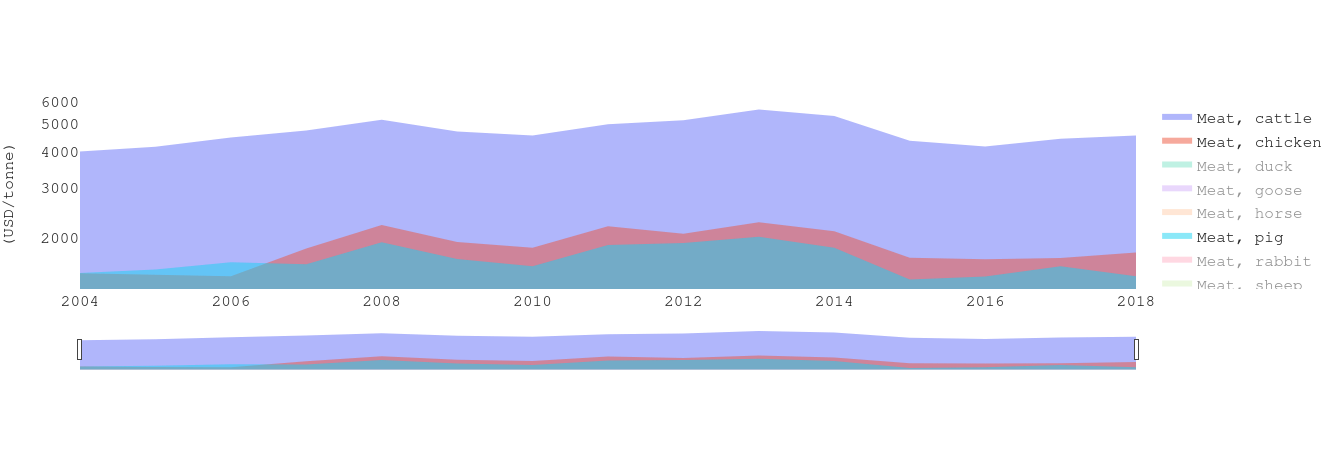

In [36]:
Prices_E_Europe_path = 'data_aslam/Prices_E_Europe/Prices_E_Europe.csv'
meat_price = pd.read_csv(Prices_E_Europe_path)

meat_price=meat_price.loc[meat_price["Area"]=="France"]
meat_price=meat_price.loc[meat_price["Unit"]=="USD"]
#meat_price=meat_price.loc[meat_price["Item"].str.match('Meat,')][["Item"]+listDate]
meat_price=meat_price.loc[meat_price["Item"].isin(listMeat)][["Item"]+listDate]


#price_food_FR_path = 'data_aslam/Prices_E_Europe/priceFR.csv'
#new_df = pd.read_csv(price_food_FR_path)
fig = go.Figure()
listMeat2=["Meat, cattle","Meat, chicken","Meat, duck","Meat, goose","Meat, horse","Meat, pig","Meat, rabbit","Meat, sheep","Meat, turkey"]

listDate2=[2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

country_to_disp = ['Meat, cattle', 'Meat, pig',"Meat, chicken"]
xx=0;
for country in listMeat:
    if(country in country_to_disp):
        fig.add_trace(go.Scatter(
            x=listDate2, 
            y=meat_price[meat_price.Item==country][listDate].to_numpy()[0],
            #visible = "legendonly",
            #fill='tonexty',
            fill='tozeroy',
            mode='none',
            #color='Area',
            name=listMeat2[xx],
          ))
        
    else:
        fig.add_trace(go.Scatter(
            x=listDate2,
            y=meat_price[meat_price.Item==country][listDate].to_numpy()[0],
            visible = "legendonly",
            fill='tozeroy',
            mode='none',
            name=listMeat2[xx],
          ))
    xx+=1;
    

fig.update_traces(opacity=0.1)

fig.update_layout(yaxis_type="log",paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',font = dict(size=16, family='Courier', color="#2B2B2B"),)

# Add range slider
fig.update_layout(
    xaxis=go.layout.XAxis(

        rangeslider=dict(
            visible=True
        ),
        type="linear"
    )
    
)
fig.update_xaxes(gridcolor = 'rgba(0,0,0,0)',title_font = dict(size=16, family='Courier', color="#2B2B2B"))
fig.update_yaxes(gridcolor = 'rgba(0,0,0,0)',title_font = dict(size=16, family='Courier', color="#2B2B2B"),title_text="(USD/tonne)")

fig.show()

#pio.write_html(fig, file='graphePriceFR.html', auto_open=True)

Plot google trends data relative to the climate changes:

In [37]:
fr_cons = pd.read_csv('data_aslam/fr_consumption.csv')

In [38]:
df_ecology = pd.read_pickle("data_martin/GoogleTrend0.pkl")
df_green_peace = pd.read_pickle("data_martin/GoogleTrend1.pkl")
df_sea_shepherd = pd.read_pickle("data_martin/GoogleTrend2.pkl")
df_climate_change = pd.read_pickle("data_martin/GoogleTrend3.pkl")
df_giec = pd.read_pickle("data_martin/GoogleTrend4.pkl")
df_global_warming = pd.read_pickle("data_martin/GoogleTrend5.pkl")

In [39]:
#important dates concerning the environment
data = [["2006-05-24", "An Inconvenient Truth Movie"],
        ['2006-11-06', "COP12"], 
        ['2007-12-03', "COP13"], 
        ['2007-09-18', "IPCC 4th Assessment Report"],
        ['2008-12-01', "COP14"], 
        ['2009-12-07', "COP15"],
        ["2009-12-18", "Copenhagen Accord"],
        ['2010-11-28', "COP16"],
        ['2011-11-27', "COP17"],
        ['2012-11-26', "COP18"],
        ['2013-11-11', "COP19"],
        ['2014-12-01', "COP20"],
        ['2015-11-30', "COP21"],
        ["2015-12-12", "Paris Agreement"],
        ['2016-11-07', "COP22"],
        ['2017-11-06', "COP23"],
        ["2018-09-08", "Rise for climate"],
        ['2018-12-03', "COP24"],
        ['2019-06-17', "COP25"],
        ["2019-03-19", "Start of School strike for the climate"]]

In [40]:
df_global_change = df_global_warming + df_climate_change
df_global_change_norm = df_global_change.copy()

#normalize google trends data
for x in range(0,28):
        df_global_change_norm.iloc[:,x] = df_global_change_norm.iloc[:,x]/df_global_change_norm.iloc[:,x].max()       
df_global_change_norm.loc[:,"Total norm"] = df_global_change_norm.sum(axis=1)

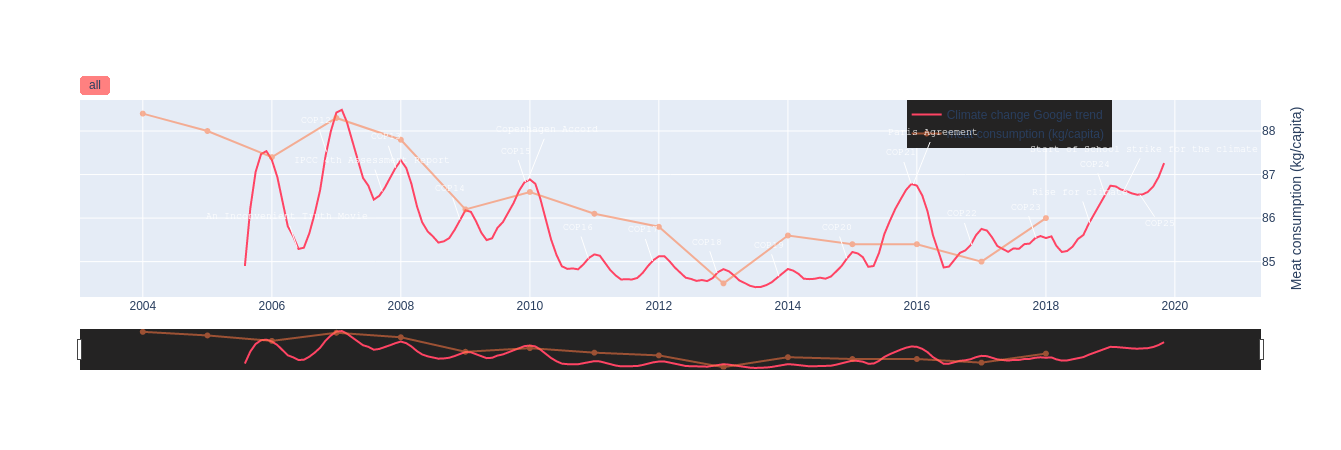

In [41]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
#fig = go.Figure()
df = df_global_change_norm.loc[:,"FR"]
#fig.add_trace(go.Scatter(x=df.index, y=df, mode='lines',name=x))
fig.add_trace(go.Scatter(x=df.index, y=signal.savgol_filter(df,15, 3), mode='lines', marker_color='#FF4464',
                        name='Climate change Google trend'),
             secondary_y=False,)

fig.add_trace(go.Scatter(
    x = fr_cons['Date'],
    y = fr_cons['Total(kg)/hab'], 
    marker_color= '#FF7944',  opacity=0.55,
name ='meat consumption (kg/capita)'),
    secondary_y = True, 
)

fig.update_yaxes(title_text="Meat consumption (kg/capita)", secondary_y=True)

hauteurAnnotation = [-45,-15,-15,-30,-15,-30,-45,-30,-15,-30,-45,-30,-15,-30,-45,-15,-30,-15,-15,-45,-15]

position = [0.8 for x in range(20)]
position[0] = 0.32
position[1] = 0.6415
position[2] = 0.5875
position[3] = 0.508
position[4] = 0.4141
position[5] = 0.5387+0.001
position[6] = 0.544
position[7] = 0.284
position[8] = 0.276
position[9] = 0.235

position[10] = 0.2245
position[11] = 0.2840
position[12] = 0.5134+0.02
position[13] = 0.5333
position[14] = 0.3293
position[15] = 0.3525
position[16] = 0.4013
position[17] = 0.4952
position[18] = 0.4975
position[19] = 0.512

arrowColor = 'white'
family = 'Courier' # font 
color = 'white'
annotationFont= dict(size=10, family=family, color=color)

for index in range(len(data)):
    if(index == 6 or index == 13):
        event = data[index]
        fig.add_annotation(
            go.layout.Annotation(
                    x=event[0],
                    y=position[index],
                    text=event[1],
                    showarrow=True,
                arrowcolor=arrowColor,
                font = annotationFont,
                    ax=20,
                    ay=-50,
            ),) 
        
    elif(index == 18):
        event = data[index]
        fig.add_annotation(
            go.layout.Annotation(
                    x=event[0],
                    y=position[index],
                    text=event[1],
                    showarrow=True,
                arrowcolor=arrowColor,
                font = annotationFont,
                    ax=20,
                    ay=30,
            ),) 
    elif(index == 19):
        event = data[index]
        fig.add_annotation(
            go.layout.Annotation(
                    x=event[0],
                    y=position[index],
                    text=event[1],
                    showarrow=True,
                arrowcolor=arrowColor,
                font = annotationFont,
                    ax=20,
                    ay=-40,
            ),) 
        
    else:
        event = data[index]
        fig.add_annotation(
            go.layout.Annotation(
                    x=event[0],
                    y=position[index],
                    text=event[1],
                    showarrow=True,
                    arrowcolor=arrowColor,
                font = annotationFont,
            ), 
        )
        
layout = go.Layout(
    yaxis=dict(
        autorange=True,
        showgrid=False,
        ticks='',
        showticklabels=False
    ), 
)


# legend onn graph
fig.update_layout(
    legend=go.layout.Legend(
        x=0.7,
        y=1,
        bgcolor="#242323"
        
    )
)

# remove y axis label    
fig.update_layout(layout)

# Add range slider
fig.update_layout(
    xaxis=go.layout.XAxis(
        rangeselector=dict(
            buttons=list([
                dict(step="all",)
            ]),  bgcolor='red'
        ),
        rangeslider=dict(
            visible=True, bgcolor='#242323',#bordercolor='blue'
        ),
        type="date"
    )
)

fig.show()
#the plot we use in our data story:
#change_config(fig).show()

#pio.write_html(change_config_graphe_1(fig), file='climate_change_google_search.html', auto_open=True)

## Google trend vs meat consumption per category

In [42]:
meat_consumption_path = 'data_aslam/DP_LIVE_23112019095726322.csv'
meat_consumption = pd.read_csv(meat_consumption_path)

meat_consumption = meat_consumption.drop(columns = ['INDICATOR', 'Flag Codes', 'FREQUENCY'])

meat_consumption = meat_consumption[meat_consumption['MEASURE'] == 'KG_CAP']
meat_consumption = meat_consumption[ (meat_consumption['TIME'] >= 2004) & (meat_consumption['TIME'] <= 2018)]
meat_consumption = meat_consumption[ (meat_consumption['LOCATION'] == 'EU27') | (meat_consumption['LOCATION'] == 'GBR')]
population_EU28_2004_2019 = [492555798, 494598322, 496436597, 498300775, 500297033, 502090235, 503170618, 502964837, 504047749, 505163053, 507235091, 508520205, 510181874, 511373278, 512379225]
population_UK_2004_2019 = [59793759, 60182050, 60620361, 61073279, 61571647, 62042343, 62510197, 63022532, 63495088, 63905342, 64351203, 64853393, 65379044, 65844142, 66273576]
UK_2004_2019_ratio = [x/y for x,y in zip(population_UK_2004_2019, population_EU28_2004_2019)]
population_EU27_2004_2019_ratio = [(x-y)/x for x,y in zip(population_EU28_2004_2019,population_UK_2004_2019)]
def ratio(row):
    """This function returns the correct ratio for a row depending on LOCATION and year"""
    if row['LOCATION'] == 'EU27':
        val = population_EU27_2004_2019_ratio[row['TIME'] - 2004]
    elif row['LOCATION'] == 'GBR':
        val = UK_2004_2019_ratio[row['TIME'] - 2004]
    return val


meat_consumption['ratio'] =  meat_consumption.apply(ratio, axis=1)
meat_consumption['Value'] = meat_consumption['ratio'] * meat_consumption['Value']

meat_consumption = meat_consumption.groupby(['TIME', 'SUBJECT'])['Value'].sum().unstack(level=1)

meat_consumption['all_consumption'] = ( 
                                    (0.7 * meat_consumption['BEEF']) +
                                    (0.78 * meat_consumption['PIG']) +
                                    (0.88 * (meat_consumption['SHEEP'] + meat_consumption['POULTRY'])))

meat_consumption['all_consumption_2'] = ( 
                                    (meat_consumption['BEEF']) +
                                    (meat_consumption['PIG']) +
                                    ((meat_consumption['SHEEP'] + meat_consumption['POULTRY'])))

meat_consumption['years'] = meat_consumption.index

In the following plot we plot the various mest consumptions of differents types of meats with the results we had from Google trend for the topic 'Climate Change':

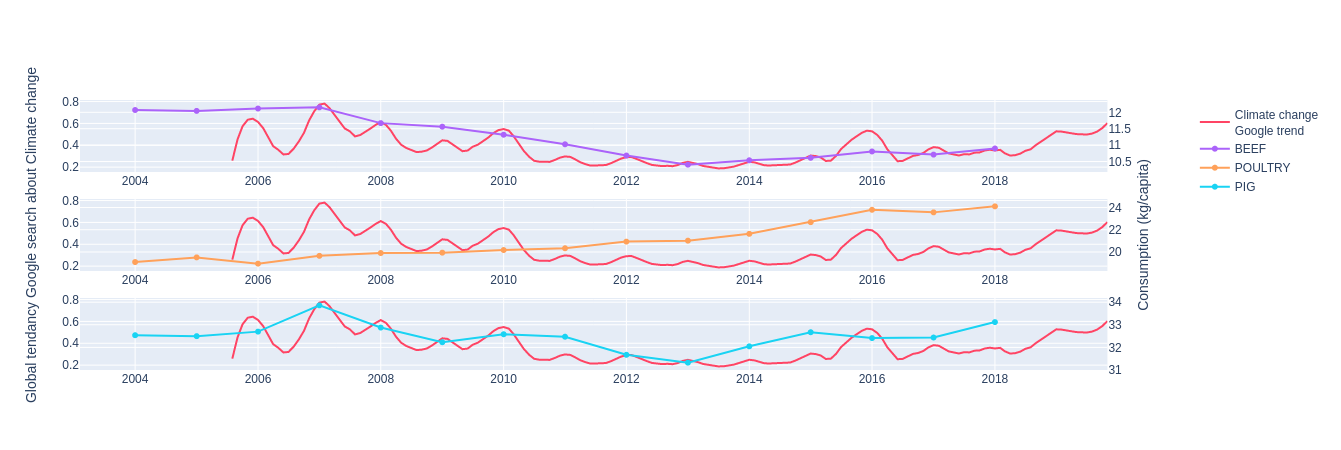

In [43]:
arrowColor = 'white'
family = 'Courier' # font 
color = 'white'
annotationFont= dict(size=10, family=family, color=color)


label_name = 'Climate change <br>Google trend'


# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}], [{"secondary_y": True}], [{"secondary_y": True}] ], rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=df.index, y=signal.savgol_filter(df,15, 3), name=label_name, marker_color='#FF4464', showlegend=False,  ), secondary_y=False, 
              row=1, col=1  ,        )


fig.add_trace(
    go.Scatter(x=df.index, y=signal.savgol_filter(df,15, 3), name=label_name,  marker_color='#FF4464', showlegend=False ), secondary_y=False, 
              row=2, col=1   ,      )

fig.add_trace(
    go.Scatter(x=df.index, y=signal.savgol_filter(df,15, 3), name=label_name,  marker_color='#FF4464'), secondary_y=False, 
              row=3, col=1  ,        )


fig.add_trace(
    go.Scatter(x=meat_consumption.years,
    y=meat_consumption.BEEF,name="BEEF"),
    secondary_y=True,
     row=1, col=1 
)
#fig.update_yaxes(title_text="Beef consumption (kg/capita)", row=1, col=1, secondary_y=True)

fig.add_trace(
    go.Scatter(x=meat_consumption.years,
    y=meat_consumption.POULTRY,name="POULTRY"),
    secondary_y=True,
     row=2, col=1, 
)

#fig.update_yaxes(title_text="Poultry consumption (kg/capita)",  row=2, col=1, secondary_y=True)

fig.add_trace(
    go.Scatter(x=meat_consumption.years,
    y=meat_consumption.PIG,name="PIG"),
    secondary_y=True,
     row=3, col=1 
)

# Set y-axes titles
fig.update_yaxes(title_text="Global tendancy Google search about Climate change", secondary_y=False, row=2, col=1)
fig.update_yaxes(title_text="Consumption (kg/capita)", secondary_y=True, row=2, col=1)

fig.show()

#pio.write_html(change_config_graphe_1(fig), file='GoogleTrendComparison.html', auto_open=True)

### Media coverage and meat consumption

Here we do the same as the previous plot, with the coverage of the topic 'Climate change' in online medias:

In [44]:
my_sheet = 'Sheet2'
file_name = "./data_martin/coverage_media.xlsx"
coverageMedia = read_excel(file_name, sheet_name = my_sheet)
coverageMedia = coverageMedia[coverageMedia['Country'] == 'FRA']
coverageMedia = coverageMedia.T

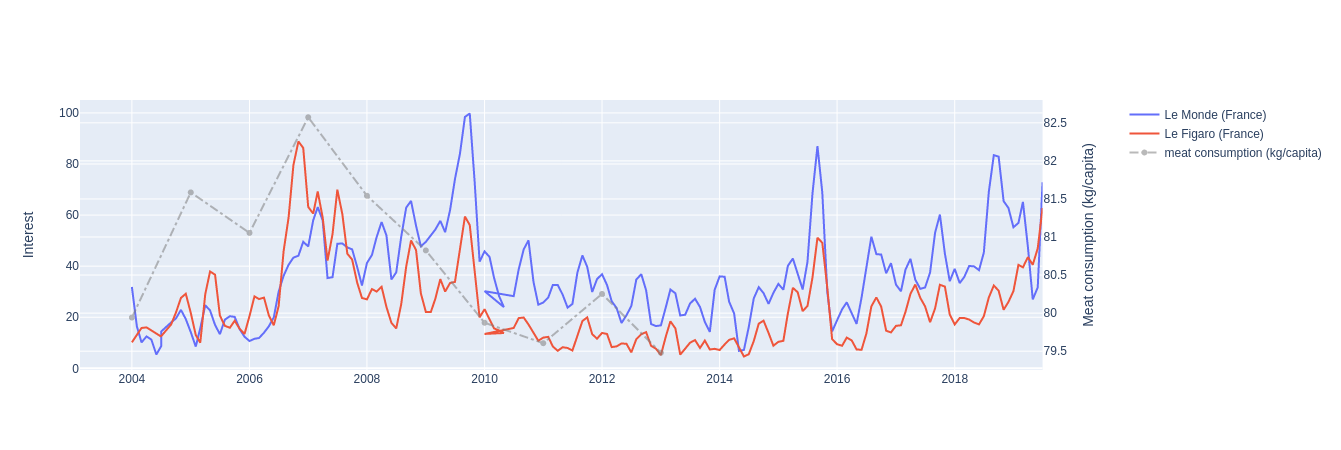

In [45]:
value_smooth = 5
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

for x in range(0,2):
    if value_smooth == 0:
        fig.add_trace(go.Scatter(x=coverageMedia.index, y=coverageMedia.iloc[2:,x], mode='lines',name=coverageMedia.iloc[1,:][5+x]), secondary_y=False, )
    else:
        fig.add_trace(go.Scatter(x=coverageMedia.index, y=signal.savgol_filter(coverageMedia.iloc[2:,x],value_smooth, 3), mode='lines',name=coverageMedia.iloc[1,:][5+x]), secondary_y=False, )

# jusqu'à 2013
fig.add_trace(
    go.Scatter(x=mean_per_year.index,
    y=mean_per_year.values,name="meat consumption (kg/capita)", opacity= 0.55,
              line=dict(color='grey', width=2,
                              dash='dashdot')),
    secondary_y=True,
    
)

# Set y-axes titles
fig.update_yaxes(title_text="Interest", secondary_y=False)
fig.update_yaxes(title_text="Meat consumption (kg/capita)", secondary_y=True)

fig.show()

As we can see, even of they are on differents scales those 2 curves seems to fluctuate the same way, which suggest that the more people are interested about the climate change, the less they eat meat.